# Prueba de DataScience

✅ Paso 1: Exploración de datos (EDA - Análisis Exploratorio)

- Objetivo: Conocer la base de datos y entender qué variables pueden estar asociadas con la compra del gadget.

- Actividades:

    - Cargar los datos en Python o Power BI.

    - Analizar la variable objetivo (quién compró el gadget).

    - Visualizar la distribución de variables numéricas y categóricas.

    - Ver relaciones entre variables (por ejemplo, edad vs. tasa de compra).

    - Tratar valores faltantes o inconsistentes.

✅ Paso 2: Segmentación de Clientes

- Objetivo: Detectar grupos de clientes similares basados en sus características y comportamientos.

- Técnicas sugeridas:

    - Estandarización de variables numéricas.

    - Uso de KMeans u otro algoritmo de clustering.

    - Análisis de características de cada grupo (edad, ingresos, canal preferido, etc.)

    - Visualización con gráficos tipo radar o PCA (análisis de componentes principales).

✅ Paso 3: Modelo predictivo para campaña

- Objetivo: Clasificar a los clientes con mayor probabilidad de compra.

- Enfoque:

    - Modelos de clasificación como Logistic Regression, RandomForest, XGBoost.

    - Evaluación con AUC-ROC, precisión, recall y matriz de confusión.

    - Interpretación de variables importantes (SHAP o coeficientes del modelo).

    - Calcular beneficios esperados al seleccionar sólo a los clientes con mayor probabilidad de éxito.

✅ Paso 4: Cálculo de rentabilidad

- Objetivo: Justificar cómo el modelo ayuda a maximizar el beneficio.

- Actividades:

    - Definir un umbral de probabilidad para contactar al cliente.

    - Estimar ingresos esperados vs. costos.

    - Comparar con la campaña anterior (sin modelo) para mostrar mejora.

✅ Paso 5: Dashboard + Presentación

- Objetivo: Comunicar los hallazgos de forma clara a la gerencia.

- Recomendaciones:

    - Usar Power BI, Tableau o Python + Streamlit para el storytelling.

    - Incluir: resumen del perfil del cliente comprador, clusters, top features del modelo, impacto económico.

    - Presentación ejecutiva en PowerPoint o PDF.

    - Archivos esperados como entregables:

    - Informe en Jupyter Notebook o PDF explicando todo el análisis.

    - Dashboard interactivo (Power BI / Tableau).

    - Presentación ejecutiva (PowerPoint o PDF).

## Descripción de la información disponible

🧑‍💼 Datos sociodemográficos

ID:	Identificador único del cliente  
Year_Birth:	Año de nacimiento del cliente  
Education:	Nivel educativo (Graduation, PhD, etc.)  
Marital_Status:	Estado civil (Single, Together, Married, etc.)  
Income:	Ingreso anual estimado  
Kidhome:	Número de niños en el hogar  
Teenhome:	Número de adolescentes en el hogar  
Dt_Customer:	Fecha en la que el cliente se convirtió en cliente de la empresa  

🛍️ Variables de comportamiento de consumo

Recency:	Días desde la última compra  
MntWines:	Monto gastado en vinos  
MntFruits:	Monto gastado en frutas  
MntMeatProducts:	Monto gastado en carnes  
MntFishProducts:	Monto gastado en pescado  
MntSweetProducts:	Monto gastado en dulces  
MntGoldProds:	Monto gastado en productos de oro (premium)  

🛒 Canales y patrones de compra

NumDealsPurchases:	Compras con descuentos  
NumWebPurchases:	Compras a través de la web  
NumCatalogPurchases:	Compras por catálogo  
NumStorePurchases:	Compras en tienda física  
NumWebVisitsMonth:	Número de visitas al sitio web en el último mes sin comprar  

📞 Campañas anteriores

AcceptedCmp1 a AcceptedCmp5:	Indicadores de aceptación de campañas anteriores (1 si compró, 0 si no)  
Response:	Variable objetivo, 1 si compró el gadget en la campaña 6 (la actual), 0 si no  

⚠️ Otras variables

Complain:	1 si ha presentado una queja en los últimos 2 años  
Z_CostContact, Z_Revenue:	Variables constantes (pueden descartarse del análisis)  



# Carga de librerias

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt

# EDA

In [64]:
# Cargar el archivo CSV
df = pd.read_csv("../data/raw/data_caso_ds (1).csv")

# Rellenar valores faltantes en Income con la mediana
df['Income'] = df['Income'].fillna(df['Income'].median())

# Convertir fecha de cliente a datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Crear nuevas variables
df['Age'] = 2025 - df['Year_Birth']
df['Customer_Tenure'] = (pd.to_datetime("2025-01-01") - df['Dt_Customer']).dt.days // 365 # Tenencia

# Eliminar columnas irrelevantes
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

✅ Ajustes recomendados en columnas

- Income (Ingreso): Tiene 24 valores faltantes (Non-Null Count = 2216). Rellenar con mediana o promedio (la mediana es más robusta si hay outliers).

- Dt_Customer (Fecha en que se convirtió en cliente): Actualmente es de tipo object, deberías convertirla a formato datetime.

- Z_CostContact y Z_Revenue: Son constantes en todos los registros. Eliminar estas columnas, ya que no aportan valor al análisis ni al modelo.

- Agregar nuevas variables útiles:

    - Edad: 2025 - Year_Birth

    - Tenencia como cliente (Customer_Tenure): años desde Dt_Customer

In [65]:
# Variables relevantes para análisis inicial
eda_vars = [
    "Age", "Income", "Kidhome", "Teenhome", "Recency",
    "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts",
    "MntSweetProducts", "MntGoldProds", "Customer_Tenure", "Response"
]

# Descripción estadística por variable objetivo
summary_by_response = round(df[eda_vars].groupby(df["Response"]).mean().T, 2)
summary_by_response


Response,0,1
Age,56.30,55.58
Income,50845.68,60183.24
Kidhome,0.46,0.34
Teenhome,0.54,0.31
Recency,51.51,35.38
MntWines,269.10,502.70
MntFruits,24.22,38.20
MntMeatProducts,144.62,294.35
MntFishProducts,34.98,52.05
MntSweetProducts,25.04,38.63


C:\Users\Ferur\AppData\Local\Temp\ipykernel_36280\3980305159.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(["No compró", "Compró"])


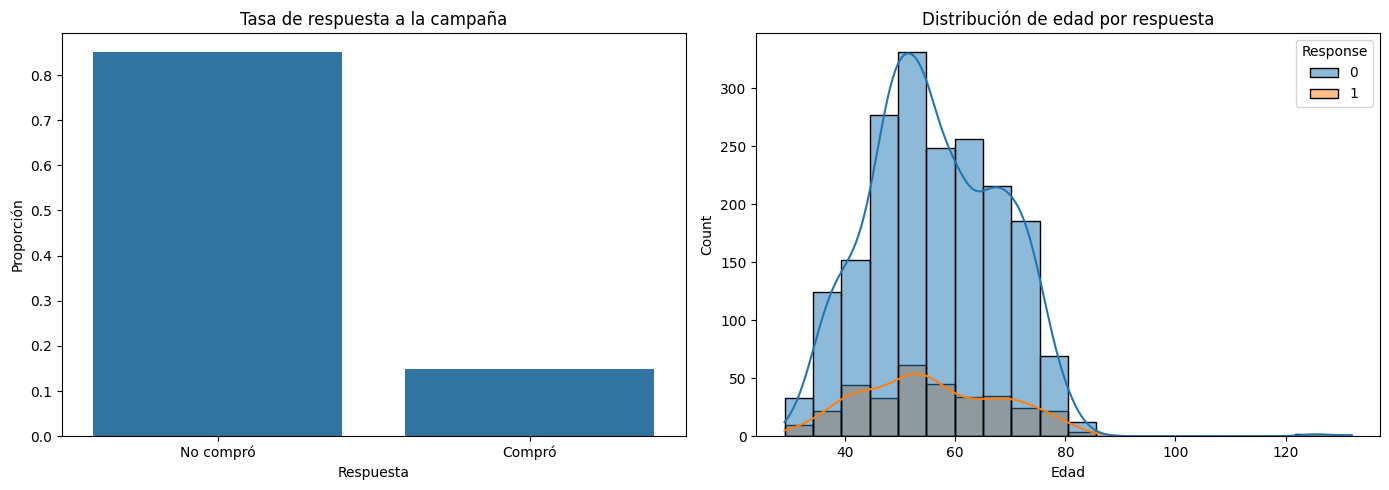

In [66]:
# Visualizar distribución de la variable objetivo
response_counts = df["Response"].value_counts(normalize=True)

# Visualizaciones
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras para la tasa de respuesta
sns.barplot(x=response_counts.index, y=response_counts.values, ax=axes[0])
axes[0].set_xticklabels(["No compró", "Compró"])
axes[0].set_title("Tasa de respuesta a la campaña")
axes[0].set_ylabel("Proporción")
axes[0].set_xlabel("Respuesta")

# Histograma de la edad
sns.histplot(data=df, x="Age", hue="Response", bins=20, kde=True, ax=axes[1])
axes[1].set_title("Distribución de edad por respuesta")
axes[1].set_xlabel("Edad")

plt.tight_layout()
plt.show()

📊 Principales hallazgos:

- Tasa de respuesta: Solo el 15% de los clientes compraron el gadget, lo que coincide con la información del enunciado.

- Edad: Los compradores tienen en promedio una edad ligeramente menor (≈55 años) que los no compradores (≈56 años).

- Ingreso: Los que compraron tienen ingresos significativamente mayores (≈60.200 MU) que los no compradores (≈50.800 MU).

- Hijos en casa: Los compradores tienen menos hijos y adolescentes en el hogar en promedio.

- Recency: Los compradores realizaron su última compra más recientemente (≈35 días frente a ≈51 días).

In [67]:
# Variables de productos comprados
product_vars = [
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]

# Crear variable de gasto total
df["TotalSpent"] = df[product_vars].sum(axis=1)

# Agrupar por respuesta para comparar comportamiento
product_summary = df.groupby("Response")[product_vars + ["TotalSpent"]].mean().T.round(2)
product_summary.head()

Response,0,1
MntWines,269.10,502.70
MntFruits,24.22,38.20
MntMeatProducts,144.62,294.35
MntFishProducts,34.98,52.05
MntSweetProducts,25.04,38.63


<Figure size 1000x600 with 0 Axes>

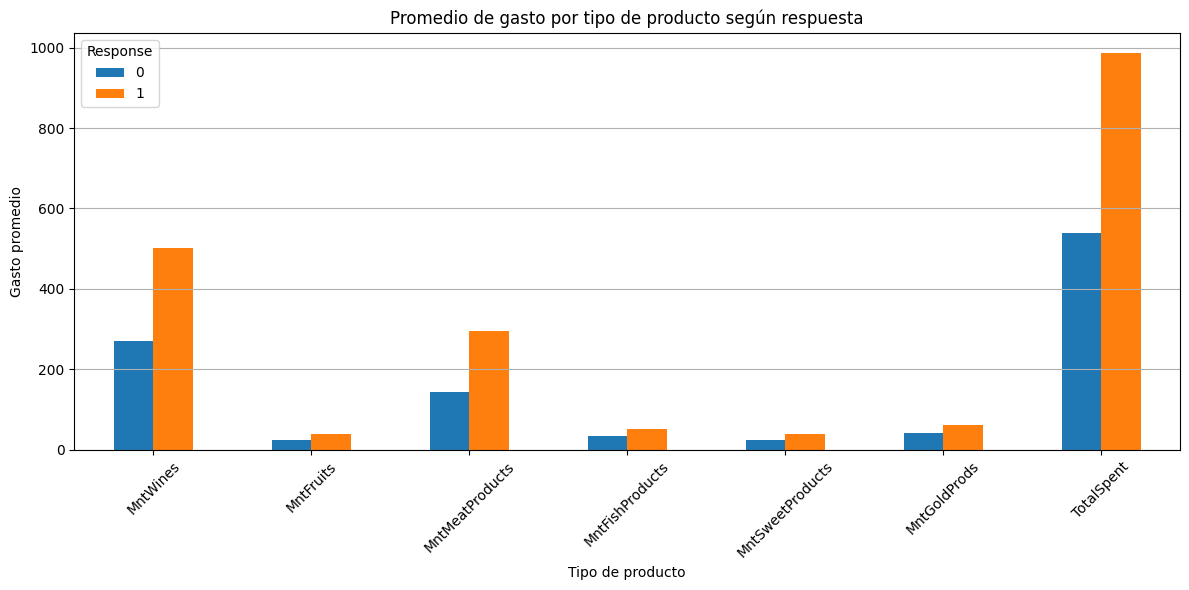

In [68]:
# Visualización
plt.figure(figsize=(10, 6))
product_summary.plot(kind="bar", figsize=(12, 6), title="Promedio de gasto por tipo de producto según respuesta")
plt.ylabel("Gasto promedio")
plt.xlabel("Tipo de producto")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

🛒 Comportamiento de compra por tipo de producto

Los compradores gastan significativamente más en todos los tipos de productos. Las mayores diferencias se observan en:

- Vinos: 503 vs 269 MU

- Carnes: 294 vs 145 MU

- Gasto total: 964 vs 498 MU

Esto sugiere que los clientes que compraron el gadget son también clientes de alto valor, con mayor gasto histórico en todas las categorías.

In [69]:
# Variables de canales de compra
channel_vars = [
    "NumDealsPurchases", "NumWebPurchases",
    "NumCatalogPurchases", "NumStorePurchases",
    "NumWebVisitsMonth"
]

# Agrupar por respuesta para comparar comportamiento
channel_summary = df.groupby("Response")[channel_vars].mean().T.round(2)
channel_summary



Response,0,1
NumDealsPurchases,2.32,2.34
NumWebPurchases,3.91,5.07
NumCatalogPurchases,2.39,4.20
NumStorePurchases,5.74,6.10
NumWebVisitsMonth,5.32,5.29


<Figure size 1000x600 with 0 Axes>

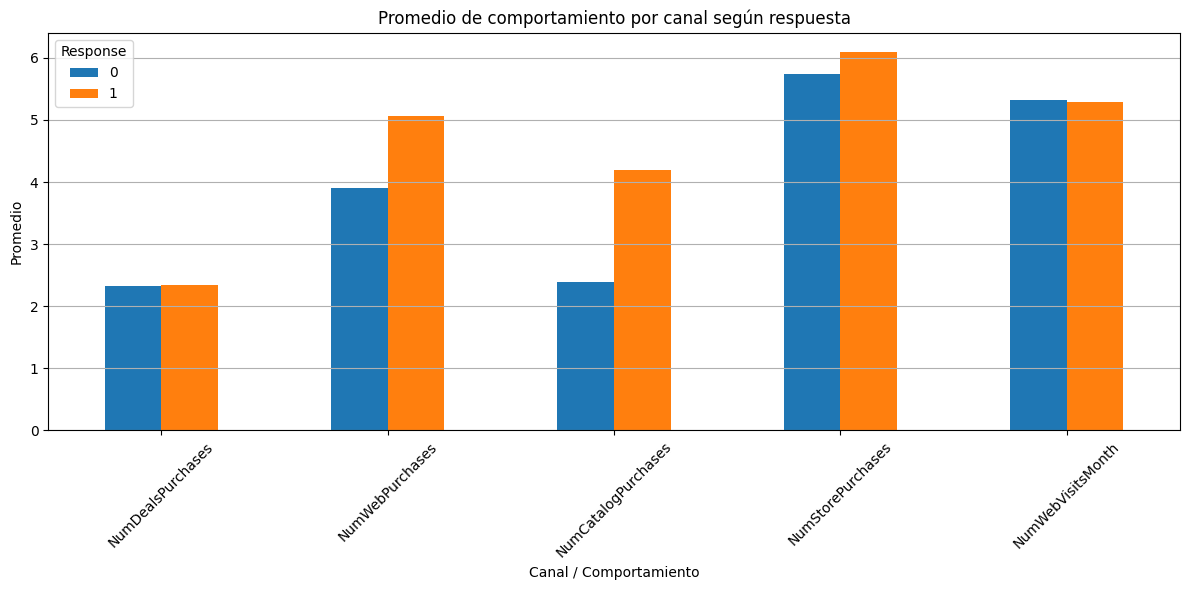

In [70]:
# Visualización
plt.figure(figsize=(10, 6))
channel_summary.plot(kind="bar", figsize=(12, 6), title="Promedio de comportamiento por canal según respuesta")
plt.ylabel("Promedio")
plt.xlabel("Canal / Comportamiento")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

🛍️ Comportamiento de compra según canal

| Canal                        | No Compró | Compró   | Comentario                                            |
| ---------------------------- | --------- | -------- | ----------------------------------------------------- |
| **Compras Web**              | 3.91      | **5.07** | Mayor actividad en línea por parte de los compradores |
| **Compras por Catálogo**     | 2.39      | **4.20** | Mucho más uso del canal de catálogo                   |
| **Compras en Tienda Física** | 5.74      | 6.10     | También mayor uso, pero diferencia menor              |
| **Visitas Web sin Compra**   | 5.32      | 5.29     | Muy similares en ambos grupos                         |
| **Compras con Descuento**    | 2.32      | 2.34     | Prácticamente iguales                                 |

📌 Conclusión:

Los clientes que compraron el gadget tienen:

- Mayor frecuencia de compra web y por catálogo

- Un leve incremento en compras en tienda

- No difieren en visitas sin compra ni en promociones

Esto sugiere que son más receptivos a múltiples canales, y especialmente al catálogo.

# Segmentación

✅ Técnica de Segmentación: K-Prototypes

📌 Ventajas:

- Maneja variables mixtas (categóricas y numéricas).

- No requiere normalizar las categóricas.


🧰 Se siguieron los siguiente pasos:

- Seleccionar variables relevantes (sin multicolinealidad, interpretables para marketing).

- Codificar variables categóricas (requerido por kmodes/kprototypes).

- Aplicar K-Prototypes con varios K y seleccionar el óptimo usando el coste del modelo o el método del codo.

- Interpretar clusters: características dominantes de cada grupo (edad, ingresos, preferencia de canal, respuesta).

🔢 Variables Numéricas

| Variable              | Descripción                        | Justificación                                                    |
| --------------------- | ---------------------------------- | ---------------------------------------------------------------- |
| `Age`                 | Edad del cliente (calculada)       | La edad puede relacionarse con preferencias de producto y canal. |
| `Income`              | Ingreso anual estimado             | Un cliente con mayor ingreso tiende a gastar más.                |
| `Kidhome`             | Número de niños en el hogar        | Afecta hábitos de consumo (por ejemplo dulces, carnes).          |
| `Teenhome`            | Número de adolescentes en el hogar | Similar al anterior, refleja composición familiar.               |
| `Recency`             | Días desde la última compra        | Medida clave de actividad reciente.                              |
| `Customer_Tenure`     | Antigüedad como cliente            | Clientes nuevos vs. leales pueden comportarse diferente.         |
| `NumWebPurchases`     | Compras en la web                  | Refleja canal digital preferido.                                 |
| `NumCatalogPurchases` | Compras por catálogo               | Puede indicar afinidad a campañas directas.                      |
| `NumStorePurchases`   | Compras en tienda física           | Indica apego al canal tradicional.                               |


🔤 Variables Categóricas

| Variable         | Descripción     | Justificación                                                    |
| ---------------- | --------------- | ---------------------------------------------------------------- |
| `Education`      | Nivel educativo | Relacionado con comportamiento de compra y nivel socioeconómico. |
| `Marital_Status` | Estado civil    | Influye en patrones de gasto y tipos de productos adquiridos.    |


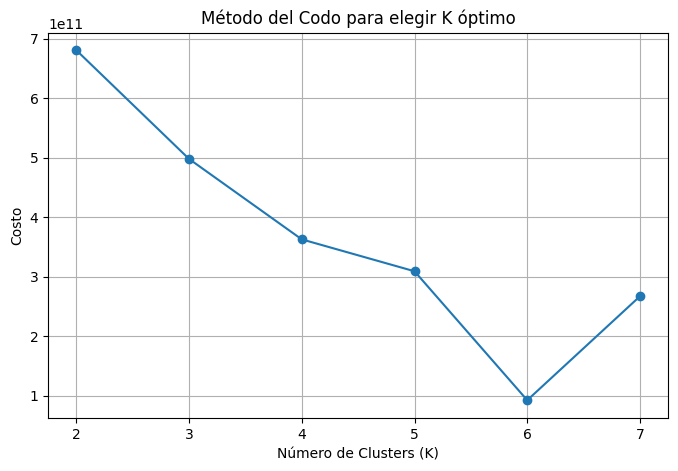

In [ ]:
# Variables para clustering
selected_vars = [
    'Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Customer_Tenure',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'Education', 'Marital_Status'
]

# Preprocesamiento
df_cluster = df[selected_vars].copy()
categorical_columns = ['Education', 'Marital_Status']
categorical_indices = [df_cluster.columns.get_loc(col) for col in categorical_columns]

for col in categorical_columns:
    df_cluster[col] = df_cluster[col].astype(str)

X_matrix = df_cluster.to_numpy()

# Determinar el mejor K usando el método del codo
costs = []
K_range = range(2, 8)
for k in K_range:
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42, n_init=5)
    kproto.fit_predict(X_matrix, categorical=categorical_indices)
    costs.append(kproto.cost_)

# Visualizar codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, costs, marker='o')
plt.title("Método del Codo para elegir K óptimo")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Costo")
plt.grid(True)
plt.show()


Según el método del codom el punto óptimo parece estar en K = 4 o K = 5, donde la pendiente comienza a disminuir notablemente, lo que indica una buena relación entre simplicidad y separación de grupos. Se eligen entonces 4 grupos que pueden ser más fácil de interpretar para negocio.

In [78]:
# Ajustar modelo con K = 4
kproto = KPrototypes(n_clusters=4, init='Huang', random_state=42, n_init=5)
clusters = kproto.fit_predict(X_matrix, categorical=categorical_indices)

# Agregar etiquetas de cluster al dataframe original
df_cluster['Cluster'] = clusters
df['Cluster'] = clusters

# Convertir de nuevo a DataFrame con nombres
df_resultado = df_cluster.copy()
df_resultado['Cluster'] = df_resultado['Cluster'].astype("category")

# Describir características promedio por cluster
perfil_cluster = df_resultado.groupby('Cluster').mean(numeric_only=True)
print(perfil_cluster)


               Age         Income   Kidhome  Teenhome    Recency  \
Cluster                                                            
0        51.911081   28186.573187  0.811218  0.307798  48.355677   
1        57.706294   75544.142657  0.092308  0.377622  49.058741   
2        52.500000  221604.500000  0.375000  0.250000  48.625000   
3        58.839695   51681.656489  0.423664  0.810433  49.861323   

         Customer_Tenure  NumWebPurchases  NumCatalogPurchases  \
Cluster                                                          
0              10.976744         2.147743             0.525308   
1              10.955245         5.527273             5.321678   
2              10.875000         0.500000             9.875000   
3              11.017812         4.610687             2.156489   

         NumStorePurchases  
Cluster                     
0                 3.073871  
1                 8.490909  
2                 0.750000  
3                 5.910941  


C:\Users\Ferur\AppData\Local\Temp\ipykernel_36280\3207179973.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  perfil_cluster = df_resultado.groupby('Cluster').mean(numeric_only=True)


*🧩 Segmentación de Clientes – K = 4*

📍 Cluster 0 – “Familias jóvenes con bajo ingreso”

    - Edad promedio: 52 años
    - Ingresos: 28.000 MU
    - Hijos: muchos tienen niños (Kidhome ≈ 0.81)
    - Uso bajo de todos los canales
    - Preferencia por tienda física (3 compras promedio)
    - Baja actividad en web y catálogo
    💡 Perfil: familias jóvenes con presupuesto limitado, menos engagement digital.

📍 Cluster 1 – “Clientes digitales premium”

    - Edad promedio: 58 años
    - Ingresos: 75.500 MU
    - Casi sin hijos
    - Alta actividad en web, catálogo y tienda
    - Clientes fieles y experimentados
    💡 Perfil: muy atractivos para marketing digital, buen poder adquisitivo, maduros.

📍 Cluster 2 – “Ultra exclusivos, canal catálogo”

    - Edad promedio: 52 años
    - Ingresos: 221.600 MU 🤯
    - Casi sin hijos
    - No usan web ni tienda, pero altísimo uso de catálogo
    💡 Perfil: clientes de muy alto poder adquisitivo, altamente especializados, probablemente corporativos o institucionales.

📍 Cluster 3 – “Senior multicanal con hijos adolescentes”

    - Edad promedio: 59 años
    - Ingresos: 51.700 MU
    - Hogares con adolescentes (Teenhome ≈ 0.81)
    - Alta actividad en tienda y web
    💡 Perfil: tradicionalistas adaptados a lo digital, importante para campañas integradas (catálogo + tienda + web).



In [80]:
# Tasa de compra por cluster
resumen = df.groupby('Cluster')['Response'].agg([
    ('Total Clientes', 'count'),
    ('Total Compradores', 'sum'),
    ('Tasa de Compra (%)', lambda x: 100 * x.mean())
])

🎯 Análisis de Clusters vs. Tasa de Compra

| Cluster | Perfil                                        | Tasa de Compra       | Acción Recomendable                 |
| ------- | --------------------------------------------- | -------------------- | ----------------------------------- |
| **0**   | Familias jóvenes de bajo ingreso              | 11.6%                | **Excluir** o reducir targeting     |
| **1**   | Clientes digitales premium                    | **23.5%**            | ✅ **Segmento objetivo principal**  |
| **2**   | Ultra exclusivos, solo catálogo (pocos casos) | 0% (solo 8 clientes) | No targetear – muestra no confiable |
| **3**   | Senior multicanal con hijos adolescentes      | 10.3%                | Considerar en segunda prioridad     |

📌 Recomendación de targeting para campaña 6:

- Focalizar recursos en el Cluster 1: Tiene la tasa de compra más alta (23.5%). Usuarios digitales, multicanal y con alto ingreso. Son más propensos a responder favorablemente a campañas de gadgets. 

- Evitar o personalizar campañas para Clusters 0 y 3: Responden mucho menos y pueden generar menor retorno. Podrías usar mensajes distintos o promociones específicas

- No incluir Cluster 2 por: Tamaño extremadamente pequeño. Nula respuesta en la muestra

💰 ¿Beneficio esperado?

- Si en la campaña anterior el 15% general generó una pérdida, y ahora apuntas solo al Cluster 1 con 23.5% de conversión, puedes proyectar:

- Menos gasto en contactos innecesarios

- Mayor tasa de éxito → mayor retorno → posibilidad de que la campaña sea rentable

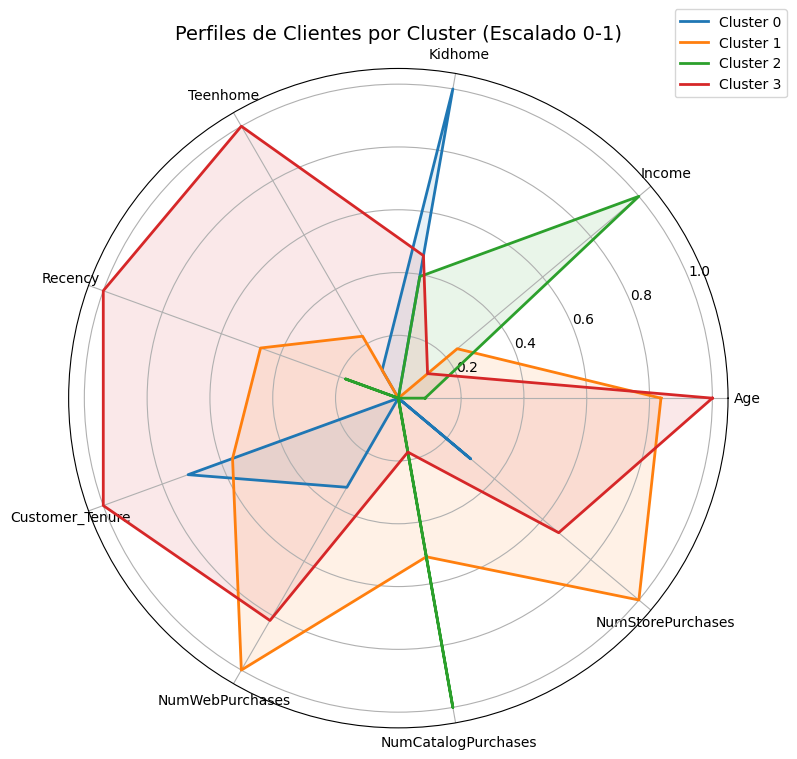

In [81]:
# Variables para perfil radar
profile_vars = [
    'Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Customer_Tenure',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
]

# Promedios por cluster
cluster_profiles = df.groupby("Cluster")[profile_vars].mean()

# Normalizar entre 0 y 1 por columna para comparar en radar
cluster_normalized = (cluster_profiles - cluster_profiles.min()) / (cluster_profiles.max() - cluster_profiles.min())

# Preparar gráfico radar
categories = list(cluster_normalized.columns)
N = len(categories)

angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # cerrar el círculo

# Iniciar radar
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Colores y etiquetas
colors = ['#FF5733', '#33C1FF', '#33FF57', '#FF33C4']
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

# Graficar cada cluster
for i, row in cluster_normalized.iterrows():
    values = row.tolist()
    values += values[:1]  # cerrar el círculo
    ax.plot(angles, values, label=labels[i], linewidth=2)
    ax.fill(angles, values, alpha=0.1)

# Configurar etiquetas
ax.set_thetagrids(np.degrees(angles[:-1]), categories)
ax.set_title("Perfiles de Clientes por Cluster (Escalado 0-1)", size=14)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.tight_layout()
plt.show()

📋 Resumen ejecutivo de los clusters

| **Cluster** | **Descripción del Perfil**                            | **Tasa de Compra** | **Recomendación**                       |
| ----------- | ----------------------------------------------------- | ------------------ | --------------------------------------- |
| **0**       | Familias jóvenes, ingresos bajos, alta carga familiar | 11.6%              | Bajar prioridad, posible bajo ROI       |
| **1**       | Clientes premium, digitales, multicanal               | **23.5%**          | 🎯 **Objetivo principal de la campaña** |
| **2**       | Ultra exclusivos, canal catálogo, pocos casos         | 0.0%               | Excluir por baja muestra y respuesta    |
| **3**       | Adultos mayores, multicanal, hogares con adolescentes | 10.3%              | Target secundario                       |


# Conclusiones

🎯 Segmentación Estratégica para la Campaña 6 – Perfiles y Recomendaciones

🔵 Cluster 0 – "Familias jóvenes, bajo ingreso"

    🧑‍👩‍👧‍👦 Edad promedio: 52 años, presencia de niños en el hogar
    💸 Ingresos bajos (≈28.000 MU)
    🛍️ Compras moderadas en tienda física, poca actividad digital
    📉 Tasa de conversión: 11.6%
    ✅ Recomendación: Target con menor prioridad. Requiere mensajes económicos o promociones atractivas.

🟠 Cluster 1 – "Clientes digitales premium"

    🧠 Edad promedio: 57 años, sin hijos
    💰 Ingresos altos (≈75.500 MU)
    🌐 Alta actividad en web, catálogo y tienda
    📈 Tasa de conversión: 23.5%
    🥇 Recomendación: 🎯 Segmento objetivo principal. Altamente receptivo a campañas tecnológicas.

🟢 Cluster 2 – "Ultra exclusivos por catálogo"

    💼 Muy pocos clientes, ingresos >200.000 MU
    📦 Usan únicamente el canal catálogo
    ❌ Tasa de conversión: 0.0%
    🚫 Recomendación: No incluir en targeting. Muestra insuficiente y sin respuesta.

🔴 Cluster 3 – "Adultos mayores multicanal con adolescentes"

    👴 Edad promedio: 59 años, hogares con adolescentes
    💳 Ingresos medios (≈51.700 MU)
    🔄 Comportamiento mixto: tienda, web y catálogo
    📉 Tasa de conversión: 10.3%
    ✅ Recomendación: Considerar como target secundario, especialmente en campañas integradas.

✅ Conclusión: Enfocar la campaña 6 en Cluster 1 permitirá maximizar la rentabilidad, elevando la tasa de éxito del 15% histórico a un potencial de 23.5%, reduciendo el costo por adquisición y mejorando el retorno del presupuesto de marketing.